In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report, roc_auc_score
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
cf_1 = [[1026,    0],[ 381,    0]]
cf_0 = ([[   0, 1026], [   0,  381]])
cf_optimized = [[899, 127], [162, 219]]

In [3]:
def get_cost(cf):
    #cf = [[814, 212], [ 105, 275]]
    total_lost = sum(cf[1])
    new_cost_replace = 50
    current_cost_replace = 10
    rate_return = .6
    current_contacted = cf[0][1] + cf[1][1]
    current_replace_cost = current_contacted * current_cost_replace
    current_retained = int(cf[1][1] * rate_return)
    new_replace = total_lost - current_retained
    new_replace_cost = new_replace * new_cost_replace
    total_cost = new_replace_cost + current_replace_cost
    return total_cost

#cost = get_cost(cf_1)
#cost

In [4]:
def plot_bar_x():
    #cf = [[802, 224], [ 99, 281]]
    #cf = [[814, 212], [ 105, 275]]
    #cf = [[678, 348], [64, 316]]
    cf = cf_optimized
    x = [0,1]
    correct = (cf[0][0], cf[1][1])
    incorrect = (cf[0][1], cf[1][0])
    ind = np.arange(len(x))
    
    p1 = plt.bar(ind, correct, alpha = .4)
    p2 = plt.bar(ind, incorrect, bottom=correct, alpha = .6)
    
    labels = ['Retained', 'Terminated']
    plt.xticks(x, labels)
    plt.title('Customers Correctly Predicted')
    plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))
    plt.show()

In [63]:
def plot_costs():
    aquire_new = get_cost(cf_1)
    contact_all = get_cost(cf_0)
    with_model = get_cost(cf_optimized)
    bars = plt.bar(['aquire new','contact_all','with_model'], height = [aquire_new, contact_all, with_model], alpha = .4)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + .2, yval + .5, yval)
    plt.show()

In [6]:
data = pd.read_csv('churn_with_preds.csv')
df = data[['customerID', 'gender', 'SeniorCitizen', 'Dependents', 'tenure', 'Contract',
           'PaperlessBilling', 'predictions']].copy()
data.drop(['Churn', 'predictions'], inplace = True, axis = 1)

In [7]:
display(HTML('<h1>Raw Data</h1>'))
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,2320-JRSDE,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.90,19.90
1,2087-QAREY,Female,0,Yes,No,22,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,54.70,1178.75
2,0601-WZHJF,Male,0,Yes,No,14,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,46.35,667.70
3,4423-JWZJN,Male,0,Yes,Yes,64,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,No,Credit card (automatic),90.25,5629.15
4,5143-WMWOG,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.95,19.95


In [8]:
#All Customers
display(HTML('<h1>All Customers with Predictions</h1>'))
df.head(10)

,customerID,gender,SeniorCitizen,Dependents,tenure,Contract,PaperlessBilling,predictions
0,2320-JRSDE,Female,0,Yes,1,Month-to-month,Yes,1
1,2087-QAREY,Female,0,No,22,Month-to-month,Yes,0
2,0601-WZHJF,Male,0,No,14,Month-to-month,No,1
3,4423-JWZJN,Male,0,Yes,64,One year,No,0
4,5143-WMWOG,Male,0,No,1,Month-to-month,No,0
5,6490-FGZAT,Male,0,No,6,Month-to-month,No,0
6,5393-RXQSZ,Male,0,No,1,Month-to-month,No,1
7,7452-FOLON,Male,0,Yes,39,One year,No,0
8,2320-TZRRH,Female,0,No,20,One year,No,0
9,0231-LXVAP,Male,0,No,1,Month-to-month,Yes,1


In [9]:
#Churn Only Customers
display(HTML('<h1>Churn Customers</h1>'))
df.query('predictions == 1').head(10)

,customerID,gender,SeniorCitizen,Dependents,tenure,Contract,PaperlessBilling,predictions
0,2320-JRSDE,Female,0,Yes,1,Month-to-month,Yes,1
2,0601-WZHJF,Male,0,No,14,Month-to-month,No,1
6,5393-RXQSZ,Male,0,No,1,Month-to-month,No,1
9,0231-LXVAP,Male,0,No,1,Month-to-month,Yes,1
10,9444-JTXHZ,Male,0,No,1,Month-to-month,No,1
17,4471-KXAUH,Female,0,No,42,Month-to-month,Yes,1
18,9752-ZNQUT,Female,0,No,1,Month-to-month,Yes,1
19,7638-QVMVY,Female,0,No,7,Month-to-month,Yes,1
22,7312-XSBAT,Male,0,No,1,Month-to-month,No,1
23,3096-GKWEB,Male,0,No,18,Month-to-month,Yes,1


In [10]:
month_to_month = len(df.query('Contract == "Month-to-month"'))
churners = len(df.query('predictions == 1'))
print('Month to Month: {}'.format(month_to_month))
print('Number of Churn: {}' .format(churners))

Month to Month: 759
Number of Churn: 521


<h1>Industry Assumptions</h1>
<ul>
    <li><h3>10 dollars to to contact customer. %60 continue if contacted</h3></li>
    <li><h3>50 dollars to replace customer</h3></li>
</ul>

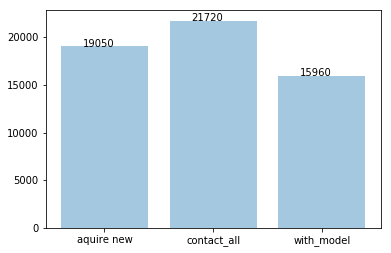

In [66]:
display(HTML('<h1>Cost to Replace 381 Customers</h1>'))
plot_costs()

In [67]:
display(HTML('<h1>Cost Savings: 16%</h1>'))

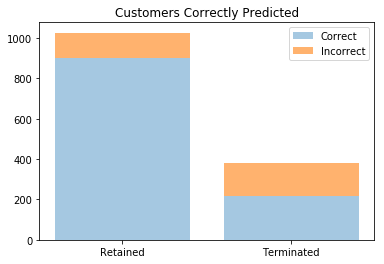

In [51]:
display(HTML('<h1>Model Performance</h1>'))
plot_bar_x();